In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/kaggle/input/flight-delay-dataset-20182022/Combined_Flights_2022.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4078318 entries, 0 to 4078317
Data columns (total 61 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   FlightDate                               object 
 1   Airline                                  object 
 2   Origin                                   object 
 3   Dest                                     object 
 4   Cancelled                                bool   
 5   Diverted                                 bool   
 6   CRSDepTime                               int64  
 7   DepTime                                  float64
 8   DepDelayMinutes                          float64
 9   DepDelay                                 float64
 10  ArrTime                                  float64
 11  ArrDelayMinutes                          float64
 12  AirTime                                  float64
 13  CRSElapsedTime                           float64
 14  ActualElapsedTime 

In [4]:
df.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",GJT,DEN,False,False,1133,1123.0,0.0,-10.0,...,1140.0,1220.0,8.0,1245,-17.0,0.0,-2.0,1200-1259,1,0
1,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",HRL,IAH,False,False,732,728.0,0.0,-4.0,...,744.0,839.0,9.0,849,-1.0,0.0,-1.0,0800-0859,2,0
2,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1529,1514.0,0.0,-15.0,...,1535.0,1622.0,14.0,1639,-3.0,0.0,-1.0,1600-1659,2,0
3,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",IAH,GPT,False,False,1435,1430.0,0.0,-5.0,...,1446.0,1543.0,4.0,1605,-18.0,0.0,-2.0,1600-1659,2,0
4,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1135,1135.0,0.0,0.0,...,1154.0,1243.0,8.0,1245,6.0,0.0,0.0,1200-1259,2,0


In [5]:
df.shape

(4078318, 61)

In [6]:
from sklearn.model_selection import train_test_split
X_train_valid,X_test,y_train_valid,y_test = train_test_split(df.drop("Cancelled",axis=1),df["Cancelled"],test_size=0.2, random_state=42)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
X_train, X_valid ,y_train, y_valid = train_test_split(X_train_valid,y_train_valid,test_size=0.2, random_state=42)

In [8]:
print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape)

(2610123, 60) (2610123,) (652531, 60) (652531,) (815664, 60) (815664,)


In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2610123 entries, 703882 to 3025663
Data columns (total 60 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   FlightDate                               object 
 1   Airline                                  object 
 2   Origin                                   object 
 3   Dest                                     object 
 4   Diverted                                 bool   
 5   CRSDepTime                               int64  
 6   DepTime                                  float64
 7   DepDelayMinutes                          float64
 8   DepDelay                                 float64
 9   ArrTime                                  float64
 10  ArrDelayMinutes                          float64
 11  AirTime                                  float64
 12  CRSElapsedTime                           float64
 13  ActualElapsedTime                        float64
 14  Distance          

In [10]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
CRSDepTime,2610123.0,1.329667e+03,490.312392,1.0,915.0,1320.0,1735.0,2359.0
DepTime,2532970.0,1.334444e+03,505.443746,1.0,917.0,1325.0,1744.0,2400.0
DepDelayMinutes,2532924.0,1.598972e+01,52.322090,0.0,0.0,0.0,11.0,7223.0
DepDelay,2532924.0,1.306460e+01,53.325962,-78.0,-5.0,-2.0,11.0,7223.0
ArrTime,2530553.0,1.458061e+03,543.007754,1.0,1047.0,1500.0,1913.0,2400.0
ArrDelayMinutes,2524619.0,1.575647e+01,51.985485,0.0,0.0,0.0,10.0,7232.0
AirTime,2524619.0,1.109972e+02,69.957726,8.0,60.0,93.0,141.0,727.0
CRSElapsedTime,2610123.0,1.413169e+02,71.789354,-48.0,89.0,124.0,171.0,690.0
ActualElapsedTime,2524619.0,1.358559e+02,71.840828,14.0,83.0,119.0,167.0,764.0
Distance,2610123.0,7.977931e+02,591.531488,31.0,366.0,643.0,1035.0,5095.0


In [11]:
X_train.isna().sum()

FlightDate                                     0
Airline                                        0
Origin                                         0
Dest                                           0
Diverted                                       0
CRSDepTime                                     0
DepTime                                    77153
DepDelayMinutes                            77199
DepDelay                                   77199
ArrTime                                    79570
ArrDelayMinutes                            85504
AirTime                                    85504
CRSElapsedTime                                 0
ActualElapsedTime                          85504
Distance                                       0
Year                                           0
Quarter                                        0
Month                                          0
DayofMonth                                     0
DayOfWeek                                      0
Marketing_Airline_Ne

In [12]:
nulls = X_train.isna().sum()[X_train.isna().sum()>0]
print(nulls)

DepTime                 77153
DepDelayMinutes         77199
DepDelay                77199
ArrTime                 79570
ArrDelayMinutes         85504
AirTime                 85504
ActualElapsedTime       85504
Tail_Number             17015
DepDel15                77199
DepartureDelayGroups    77199
TaxiOut                 78575
WheelsOff               78575
WheelsOn                79572
TaxiIn                  79572
ArrDelay                85504
ArrDel15                85504
ArrivalDelayGroups      85504
dtype: int64


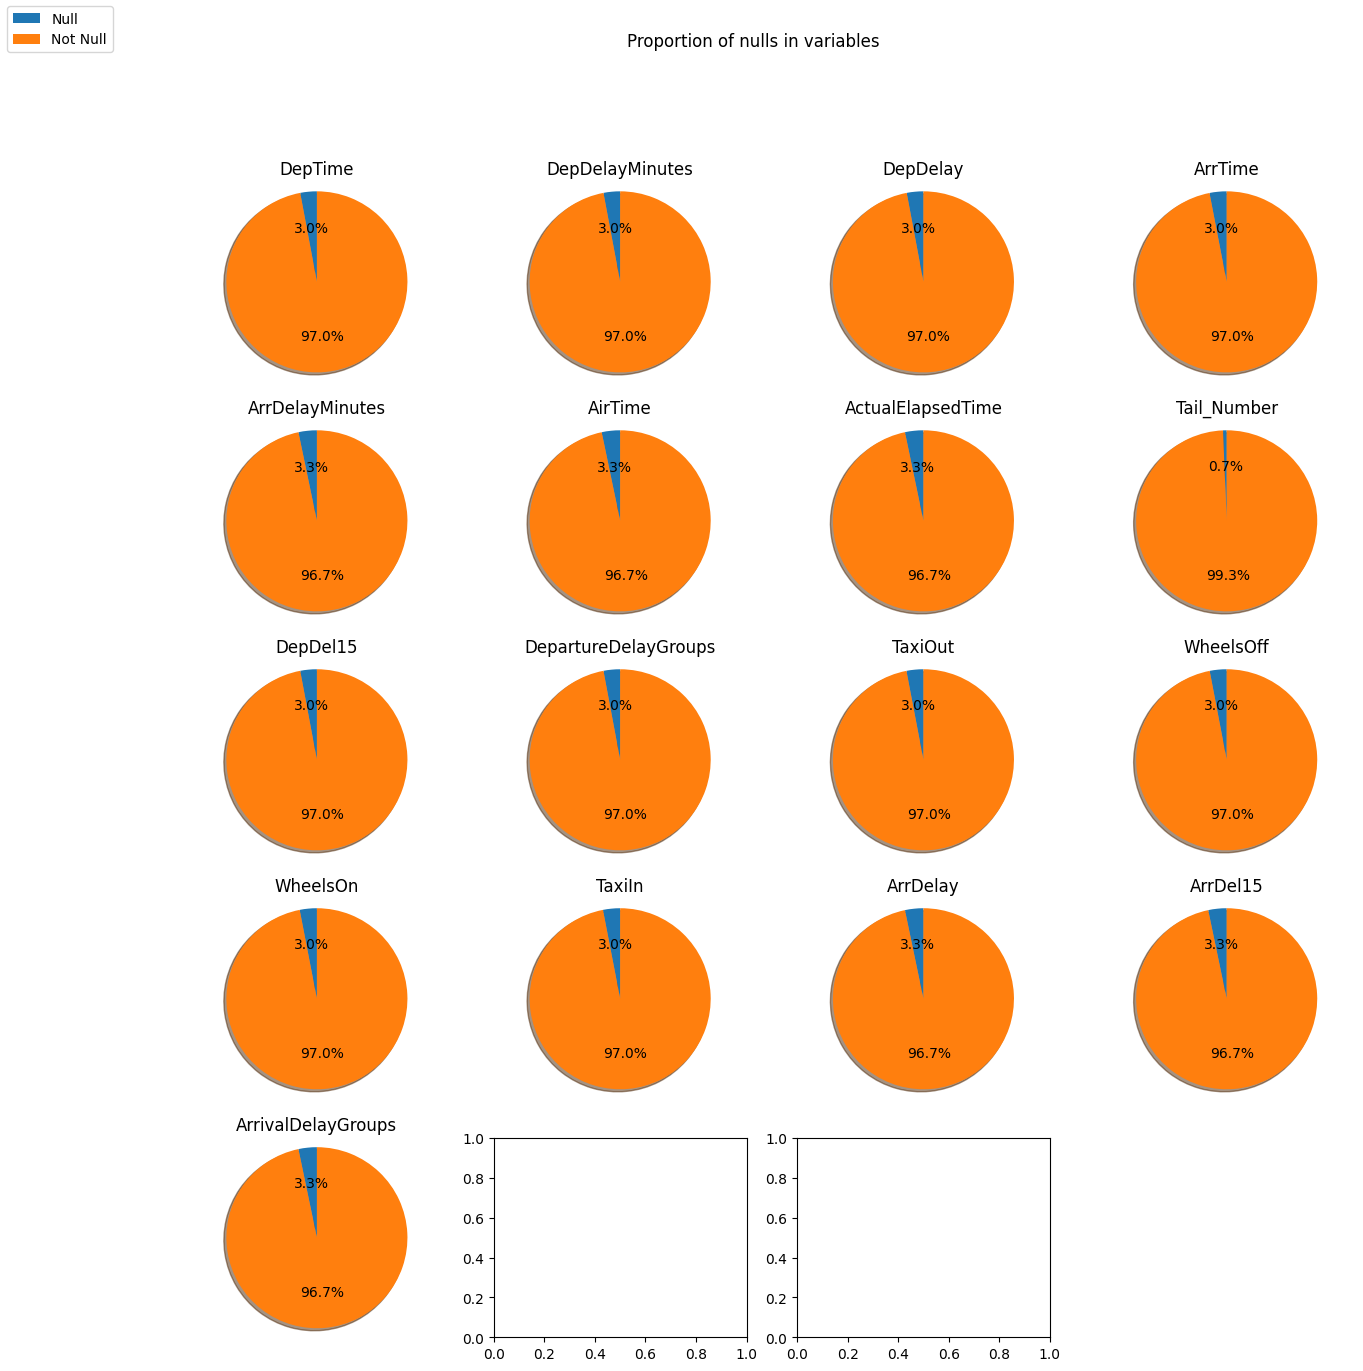

In [13]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(5,4,figsize=(15,15))
axs = axs.flatten()
for count,obj in enumerate(nulls.index):
    nulls = X_train[obj].isna().sum()
    axs[count].pie([nulls,X_train.shape[0]-nulls],autopct='%1.1f%%',
        shadow=True, startangle=90)
    axs[count].axis('equal')
    axs[count].set_title(obj, loc = "center",)
axs[19].remove()
fig.suptitle("Proportion of nulls in variables")
fig.legend(["Null","Not Null"],loc = "upper left")
plt.show()

In [14]:
print("Hello Again!")

Hello Again!


In [15]:
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [16]:
# pd.reset_option('display.max_rows')

In [17]:
X_train.head(3)

,FlightDate,Airline,Origin,Dest,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
703882,2022-02-08,Southwest Airlines Co.,ONT,OAK,False,1850,1848.0,0.0,-2.0,2000.0,0.0,56.0,85.0,72.0,362.0,2022,1,2,8,2,WN,WN,19393,WN,2238,WN,19393,WN,N452WN,2238,13891,1389101,32575,"Ontario, CA",CA,6,California,91,13796,1379608,32457,"Oakland, CA",CA,6,California,91,0.0,-1.0,1800-1859,10.0,1858.0,1954.0,6.0,2015,-15.0,0.0,-1.0,2000-2059,2,0
1796603,2022-05-20,Horizon Air,BOI,GEG,False,805,933.0,88.0,88.0,942.0,87.0,56.0,70.0,69.0,287.0,2022,2,5,20,5,AS,AS_CODESHARE,19930,AS,2373,QX,19687,QX,N402QX,2373,10713,1071302,30713,"Boise, ID",ID,16,Idaho,83,11884,1188402,31884,"Spokane, WA",WA,53,Washington,93,1.0,5.0,0800-0859,9.0,942.0,938.0,4.0,815,87.0,1.0,5.0,0800-0859,2,0
3725964,2022-03-21,American Airlines Inc.,OMA,DFW,False,700,655.0,0.0,-5.0,851.0,0.0,93.0,124.0,116.0,583.0,2022,1,3,21,1,AA,AA,19805,AA,2540,AA,19805,AA,N802AW,2540,13871,1387102,33316,"Omaha, NE",NE,31,Nebraska,65,11298,1129806,30194,"Dallas/Fort Worth, TX",TX,48,Texas,74,0.0,-1.0,0700-0759,13.0,708.0,841.0,10.0,904,-13.0,0.0,-1.0,0900-0959,3,0


In [18]:
X_train['FlightDate'] = np.array([np.datetime64(date) for date in X_train['FlightDate']])

In [19]:
X_train['FlightDate'].dtypes

dtype('<M8[s]')

In [20]:
# X_train['year'] = pd.to_datetime(df['FlightDate']).dt.year
# X_train['month'] = pd.to_datetime(df['FlightDate']).dt.month
# X_train['day'] = pd.to_datetime(df['FlightDate']).dt.day
# X_train.drop(["year","month","day"],axis = 1, inplace = True)

In [21]:
X_train.drop(["FlightDate","Year","Month","DayofMonth","DayOfWeek"],axis = 1, inplace = True)

In [22]:
nulls = X_train.isna().sum()[X_train.isna().sum()>0]
print(nulls)

DepTime                 77153
DepDelayMinutes         77199
DepDelay                77199
ArrTime                 79570
ArrDelayMinutes         85504
AirTime                 85504
ActualElapsedTime       85504
Tail_Number             17015
DepDel15                77199
DepartureDelayGroups    77199
TaxiOut                 78575
WheelsOff               78575
WheelsOn                79572
TaxiIn                  79572
ArrDelay                85504
ArrDel15                85504
ArrivalDelayGroups      85504
dtype: int64


In [23]:
print(nulls.dtype)

int64


In [24]:
for col in X_train.columns:
    if(X_train[col].isna().sum() > 0):
        if(X_train[col].dtype=="object"):
            X_train[col].fillna(X_train[col].mode()[0],inplace = True)
        elif(X_train[col].dtype=="bool"):
            X_train[col].fillna(X_train[col].median(), inplace = True)
        else:
            X_train[col].fillna(X_train[col].mean(), inplace = True)
    

In [25]:
# for i in nulls:
#     if(X_train[i[0]].dtype=="object"):
#         X_train[i[0]].fillna(X_train[i].mode()[0],inplace = True)
#     elif(X_train[i].dtype=="bool"):
#         X_train[i].fillna(X_train[i].median(), inplace = True)
#     else:
#         X_train[i].fillna(X_train[i].mean(), inplace = True)

In [26]:
X_train.isna().sum()

Airline                                    0
Origin                                     0
Dest                                       0
Diverted                                   0
CRSDepTime                                 0
DepTime                                    0
DepDelayMinutes                            0
DepDelay                                   0
ArrTime                                    0
ArrDelayMinutes                            0
AirTime                                    0
CRSElapsedTime                             0
ActualElapsedTime                          0
Distance                                   0
Quarter                                    0
Marketing_Airline_Network                  0
Operated_or_Branded_Code_Share_Partners    0
DOT_ID_Marketing_Airline                   0
IATA_Code_Marketing_Airline                0
Flight_Number_Marketing_Airline            0
Operating_Airline                          0
DOT_ID_Operating_Airline                   0
IATA_Code_

In [27]:
categorical = (X_train.select_dtypes(include="object")).columns
numerical = (X_train.select_dtypes(exclude="object")).columns

In [28]:
X_train[categorical].nunique()

Airline                                      21
Origin                                      375
Dest                                        374
Marketing_Airline_Network                    10
Operated_or_Branded_Code_Share_Partners      14
IATA_Code_Marketing_Airline                  10
Operating_Airline                            21
IATA_Code_Operating_Airline                  21
Tail_Number                                5895
OriginCityName                              369
OriginState                                  53
OriginStateName                              53
DestCityName                                368
DestState                                    53
DestStateName                                53
DepTimeBlk                                   19
ArrTimeBlk                                   19
dtype: int64

In [29]:
xTrain = X_train.copy()
for colname in X_train.select_dtypes("object"):
    xTrain[colname], _ = X_train[colname].factorize()
discrete_features = xTrain.dtypes == int

In [30]:
from sklearn.feature_selection import mutual_info_regression
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
mi = make_mi_scores(xTrain,y_train,discrete_features)[0:20]

In [31]:
discrete_features.info

<bound method Series.info of Airline                                     True
Origin                                      True
Dest                                        True
Diverted                                   False
CRSDepTime                                  True
DepTime                                    False
DepDelayMinutes                            False
DepDelay                                   False
ArrTime                                    False
ArrDelayMinutes                            False
AirTime                                    False
CRSElapsedTime                             False
ActualElapsedTime                          False
Distance                                   False
Quarter                                     True
Marketing_Airline_Network                   True
Operated_or_Branded_Code_Share_Partners     True
DOT_ID_Marketing_Airline                    True
IATA_Code_Marketing_Airline                 True
Flight_Number_Marketing_Airline         

In [32]:
X_train = X_train[mi.index]
X_train.head()

,TaxiIn,TaxiOut,ArrTime,WheelsOn,WheelsOff,DepartureDelayGroups,DepDel15,DepDelay,DepTime,DepDelayMinutes,ArrDelayMinutes,ArrivalDelayGroups,AirTime,ArrDelay,ActualElapsedTime,ArrDel15,Tail_Number,Distance,DivAirportLandings,OriginCityMarketID
703882,6.0,10.0,2000.0,1954.0,1858.0,-1.0,0.0,-2.0,1848.0,0.0,0.0,-1.0,56.0,-15.0,72.0,0.0,N452WN,362.0,0,32575
1796603,4.0,9.0,942.0,938.0,942.0,5.0,1.0,88.0,933.0,88.0,87.0,5.0,56.0,87.0,69.0,1.0,N402QX,287.0,0,30713
3725964,10.0,13.0,851.0,841.0,708.0,-1.0,0.0,-5.0,655.0,0.0,0.0,-1.0,93.0,-13.0,116.0,0.0,N802AW,583.0,0,33316
3972053,3.0,9.0,1624.0,1621.0,1610.0,2.0,1.0,36.0,1601.0,36.0,24.0,1.0,71.0,24.0,83.0,1.0,N8668A,479.0,0,31454
54071,6.0,20.0,2143.0,2137.0,1955.0,5.0,1.0,75.0,1935.0,75.0,73.0,4.0,102.0,73.0,128.0,1.0,N8549Z,672.0,0,32457


In [35]:
categorical = (X_train.select_dtypes(include="object")).columns
numerical = (X_train.select_dtypes(exclude="object")).columns

In [36]:
X_train[categorical].nunique()[X_train[categorical].nunique()>10].index

Index(['Tail_Number'], dtype='object')

In [37]:
from category_encoders import *
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
enc = TargetEncoder(cols=X_train[categorical].nunique()[X_train[categorical].nunique()>10].index, min_samples_leaf=20, smoothing=10).fit(X_train, y_train)
X_train = enc.transform(X_train)
for i in (set(categorical)-set(X_train[categorical].nunique()[X_train[categorical].nunique()>10].index)):
    X_train[i] = le.fit_transform(X_train[i])

In [38]:
from xgboost import XGBClassifier

In [39]:
xgb = XGBClassifier(n_estimators=1500,
            learning_rate= 0.1,
            max_depth=1500,
            subsample= 0.999,
            colsample_bytree= 0.9999999,
            tree_method= 'hist',
            random_state= 120,
        )

In [40]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9999999, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1500, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=120, ...)

In [51]:
# colToDrop = []
# for col in X_valid.columns :
#     if(col not in X_train.columns):
#        colToDrop.append(col)

In [53]:
# print(colToDrop)
# print(len(colToDrop))

['FlightDate', 'Airline', 'Origin', 'Dest', 'Diverted', 'CRSDepTime', 'CRSElapsedTime', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners', 'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline', 'Flight_Number_Marketing_Airline', 'Operating_Airline', 'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline', 'Flight_Number_Operating_Airline', 'OriginAirportID', 'OriginAirportSeqID', 'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName', 'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepTimeBlk', 'CRSArrTime', 'ArrTimeBlk', 'DistanceGroup']
40


In [55]:
# X_valid = X_valid.drop(columns=colToDrop)

In [56]:
# print(X_train.shape, X_valid.shape)

(2610123, 20) (652531, 20)


In [62]:
# print(X_train.columns)

Index(['TaxiIn', 'TaxiOut', 'ArrTime', 'WheelsOn', 'WheelsOff',
       'DepartureDelayGroups', 'DepDel15', 'DepDelay', 'DepTime',
       'DepDelayMinutes', 'ArrDelayMinutes', 'ArrivalDelayGroups', 'AirTime',
       'ArrDelay', 'ActualElapsedTime', 'ArrDel15', 'Tail_Number', 'Distance',
       'DivAirportLandings', 'OriginCityMarketID'],
      dtype='object')


In [63]:
# print(X_valid.columns)

Index(['DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime', 'ArrDelayMinutes',
       'AirTime', 'ActualElapsedTime', 'Distance', 'Tail_Number',
       'OriginCityMarketID', 'DepDel15', 'DepartureDelayGroups', 'TaxiOut',
       'WheelsOff', 'WheelsOn', 'TaxiIn', 'ArrDelay', 'ArrDel15',
       'ArrivalDelayGroups', 'DivAirportLandings'],
      dtype='object')


In [57]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.impute import SimpleImputer

In [58]:
# scaler = StandardScaler()
# scaler.fit(X_train)

StandardScaler()

In [59]:
# imputer = SimpleImputer(strategy='mean')
# imputer.fit(X_train)

SimpleImputer()

In [60]:
# X_train_scaled = scaler.transform(X_train)
# X_train_imputed = imputer.transform(X_train)

In [61]:
# X_valid_scaled = scaler.transform(X_valid)
# X_valid_imputed = imputer.transform(X_valid)

ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.
